In [1]:
from collections import deque
import heapq

import matplotlib.pyplot as plt
import pandas as pd
import time

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

from IPython.display import display, Image

### Queueing Structures

- Stack:
    - First-In-Last-Out(FILO) or Last-In-First-Out(LIFO)
- Queue:
    - First-In-First-Out (FIFO)
- Priority Queue:
    - Highest priority item is kept first always

<div>
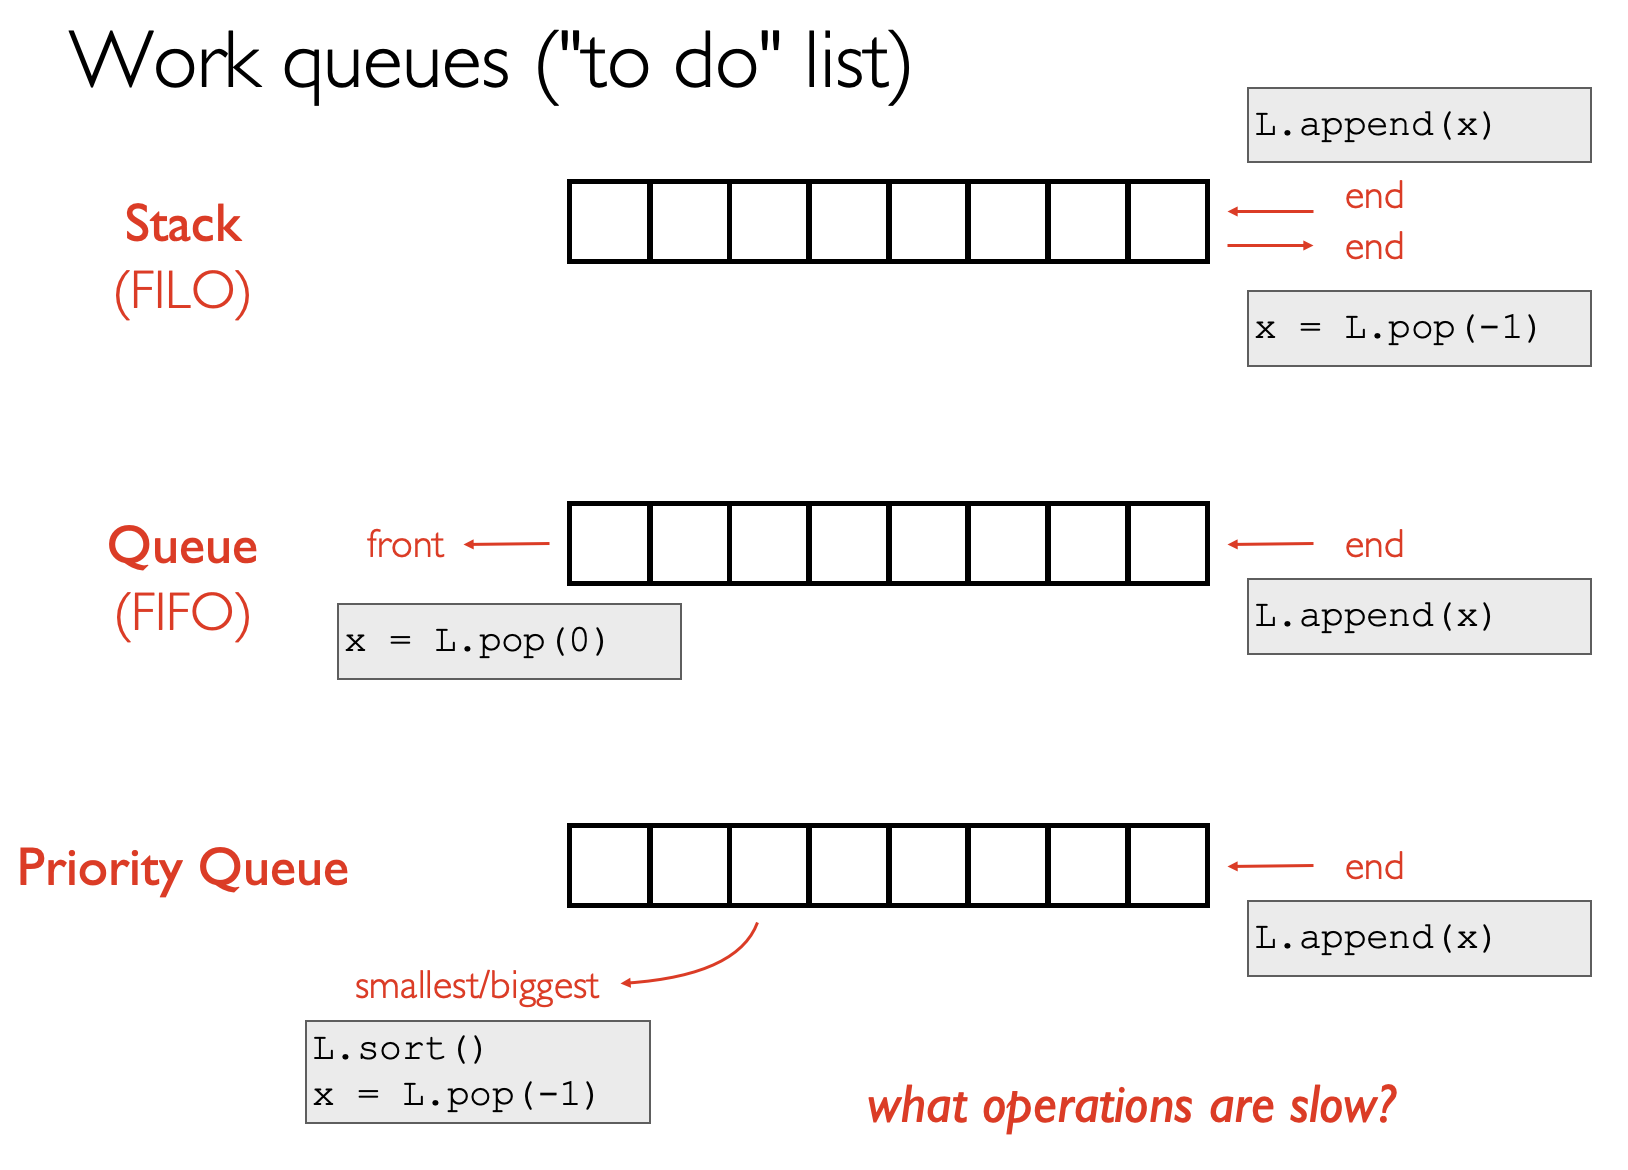
</div>

Slow operations:
- `x = L.pop(0)`
- `L.sort()`

### Using `heapq` (priority queue)

**IMPORTANT**: Unlike `deque`, `heapq` is not a type by itself.

- Operations:
    - `heapq.heappush(LIST, VAL)`:
        - adds VAL to the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `val = heapq.heappop(LIST)`
        - removes the smallest item from the list
        - re-shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `heapq.heapify(LIST)`
        - shuffles value to move smallest value to the front

In [2]:
data = []
vals = [5, 3, 1, 4, 2]
for val in vals:
    heapq.heappush(data, val)
data

[1, 2, 3, 5, 4]

In [3]:
while len(data) > 0:
    val = heapq.heappop(data)
    print(val, data)

1 [2, 4, 3, 5]
2 [3, 4, 5]
3 [4, 5]
4 [5]
5 []


In [4]:
data = [5, 3, 1, 4, 2]
heapq.heapify(data)
print(data)

[1, 2, 5, 4, 3]


### Benchmarking `stack`, `queue`, and `priority queue` for performance

,stack,queue,prio queue
1000,0.142574,0.297070,7.537603
2000,0.142336,0.324488,13.701200
5000,0.147343,1.047611,34.289598
10000,0.157833,1.934767,64.786434


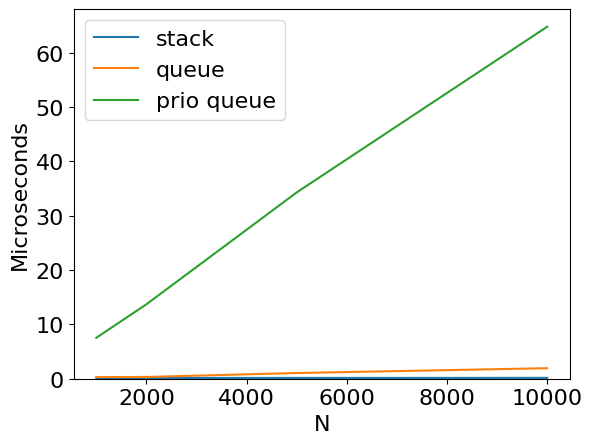

In [5]:
iters = 1000

def benchmark_microsec(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using a list data structure
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)    # O(1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)     # O(N)
        elif pattern == "prio queue":
            data.append(i % 10)
            data.sort()         # O(N log N)
            _ = data.pop(0)     # O(N) - can be ignored because of sort
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    df.loc[N,"prio queue"] = benchmark_microsec([1]*N, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

,stack,queue,prio queue
1000,0.141144,0.160217,0.516415
2000,0.141382,0.159025,0.531673
5000,0.198841,0.158310,0.529051
10000,0.138998,0.158548,0.557899


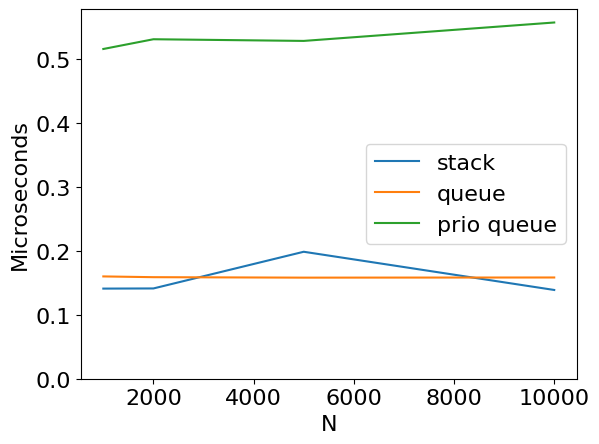

In [6]:
def benchmark_microsec_v2(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using list, deque, and heapq list data structures
    """
    t0 = time.time()
    for i in range(iters):
        if pattern == "stack":
            # still uses list
            data.append(i % 10)
            _ = data.pop(-1)    # O(1)
        elif pattern == "queue":
            # use a deque instead of a list
            data.append(i % 10)
            _ = data.popleft()  # O(1)
        elif pattern == "prio queue":
            # use a heapq instead of a list
            heapq.heappush(data, i % 10) # O(log N)
            _ = heapq.heappop(data)      # O(log N)
            
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec_v2([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec_v2(deque([1]*N), "queue")
    data = [1]*N
    heapq.heapify(data)
    df.loc[N,"prio queue"] = benchmark_microsec_v2(data, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

# Web 1: Selenium

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page

In [7]:
options = Options()
options.headless = True # don't use a GUI (necessary on a VM)
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

### page1.html: Javascript table example

In [8]:
url = "https://www.msyamkumar.com/cs320/tricky/page1.html"
# TODO: send HTTP GET request to URL
b.get(url)

# TODO: display HTML source for the page
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      function addTable() {
        var html = "<table border=1 id='coords'>\n";
        html += "<tr><td>x</td><td>y</td></tr>\n";
        for (i = 0; i < 10; i++) {
          html += "<tr><td>" + (i*2) + "</td><td>" + (i*2+1) + "</td></tr>\n";
        }
        html += "</table>";

        var t = document.createElement("div");
        t.innerHTML = html;
        document.body.appendChild(t);
      }
      
      function main() {
        setTimeout(addTable, 1000)
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Welcome</h1>
    <h3>Here's a table</h3>
    <table border="1" id="alpha">
      <tbody><tr><td>A</td><td>B</td><td>C</td></tr>
      <tr><td>1</td><td>2</td><td>3</td></tr>
      <tr><td>4</td><td>5</td><td>6</td></tr>
    </tbody></table>

    <h3>And another one...</h3>
  

</body></html>


### How can we get the 2nd table?

- Run `b.page_source` again
- Selenium obtains the updated DOM tree and converts it back into HTML for us

In [9]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      function addTable() {
        var html = "<table border=1 id='coords'>\n";
        html += "<tr><td>x</td><td>y</td></tr>\n";
        for (i = 0; i < 10; i++) {
          html += "<tr><td>" + (i*2) + "</td><td>" + (i*2+1) + "</td></tr>\n";
        }
        html += "</table>";

        var t = document.createElement("div");
        t.innerHTML = html;
        document.body.appendChild(t);
      }
      
      function main() {
        setTimeout(addTable, 1000)
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Welcome</h1>
    <h3>Here's a table</h3>
    <table border="1" id="alpha">
      <tbody><tr><td>A</td><td>B</td><td>C</td></tr>
      <tr><td>1</td><td>2</td><td>3</td></tr>
      <tr><td>4</td><td>5</td><td>6</td></tr>
    </tbody></table>

    <h3>And another one...</h3>
  

</body></html>


### Finding elements

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element

In [10]:
# TODO: find first table using id "alpha"
print(b.find_elements("id", "alpha"))

[<selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="ff4a6688-afb2-4147-bae9-4d38bec7a43a")>]


In [11]:
# TODO: repeat GET request and find all tables using tag "table"
b.get(url)
tbls = b.find_elements("tag name", "table")
print(len(tbls))

1


### POLLING: How would we know when the updated page becomes available?
- keep checking regularly until you get all the details you are looking for.

In [12]:
b.get(url)

while True:
    tbls = b.find_elements("tag name", "table")
    print("Tables:", len(tbls))
        
    if len(tbls) == 2:
        print(tbls)
        break
    
    time.sleep(0.1) # sleep for 0.1 second

Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 2
[<selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="0f0981b8-ba02-4d8c-806e-bff0aa63f4ac")>, <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="44fa841f-24ed-4a41-8ae4-14fe56ae93a5")>]


### Let's extract the 2nd table information

In [13]:
b.find_elements("tag name", "tr") # gives us all tr elements on the webpage

[<selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="b43bab68-b35d-4025-af18-24959660b4fb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="2c5fc4ac-a64d-485c-9276-e42bb897c380")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="1a195007-3b5c-40f8-8d75-b264c3840ac0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="647d97b4-1354-408d-89c1-712b978d70ec")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="55563c96-3a56-4778-9c83-58b71fa18568")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="dde1ec3f-86fa-41f6-a4ab-15c07f6463d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1a03600a85216746da0e9dd0ca36b740", element="54b9928f-f68f-4477-8c47-3d

In [14]:
tbl = tbls[-1]

# TODO: find all tr elements
trs = tbl.find_elements("tag name", "tr")

# TODO: find all td elements
# TODO: extract text for all td elements into a list of list
rows = []

for tr in trs:
    tds = tr.find_elements("tag name", "td")
    assert len(tds) == 2
    rows.append([tds[0].text, tds[1].text])
    
rows

[['x', 'y'],
 ['0', '1'],
 ['2', '3'],
 ['4', '5'],
 ['6', '7'],
 ['8', '9'],
 ['10', '11'],
 ['12', '13'],
 ['14', '15'],
 ['16', '17'],
 ['18', '19']]

### Converting `rows` into a `DataFrame`

In [15]:
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


### How can we visually see the page on the VM?

- Operations:
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook

In [16]:
b.save_screenshot("page1.png")

True

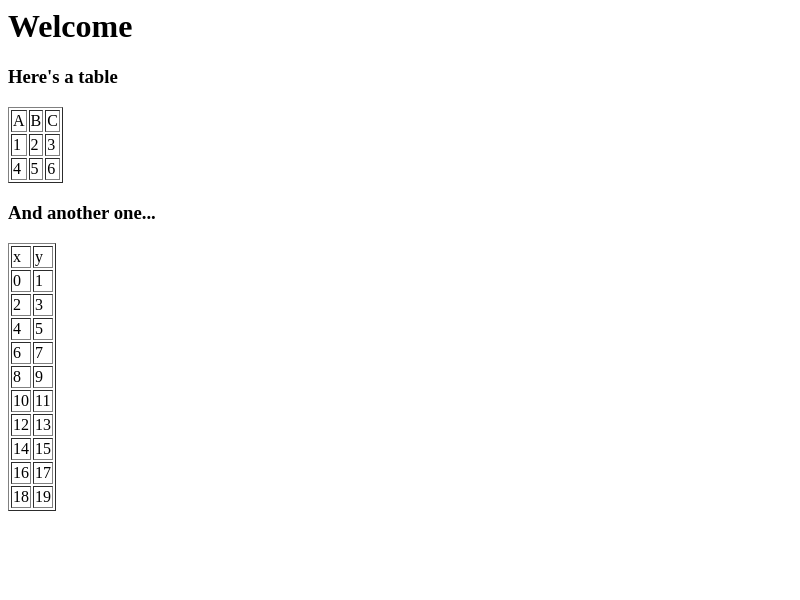

In [17]:
display(Image("page1.png"))

### Combining taking screenshot and displaying it
- useful for p3

In [18]:
def show_screen():
    b.save_screenshot("out.png")
    display(Image("out.png"))

### page2.html: "Show More!" button example

- Operations:
    `button_oject.click()`: enables us to click the button

In [19]:
url = "https://www.msyamkumar.com/cs320/tricky/page2.html"
b.get(url)

In [20]:
# TODO: find the id for the more button (inspect element on browser)
button = b.find_element("id", "more")

In [21]:
# TODO: click the button
button.click() 
# keep running this cell reptitively
# once all data is retrieved, we will run into NoSuchElementException

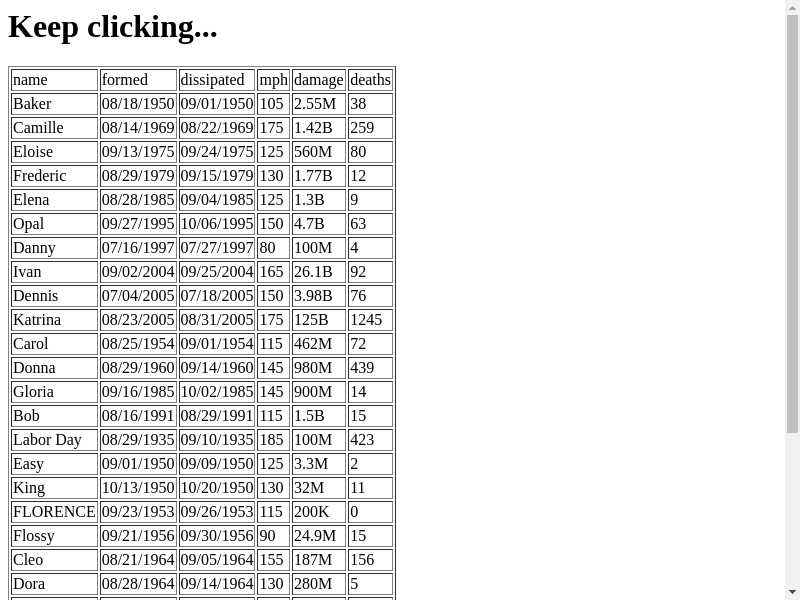

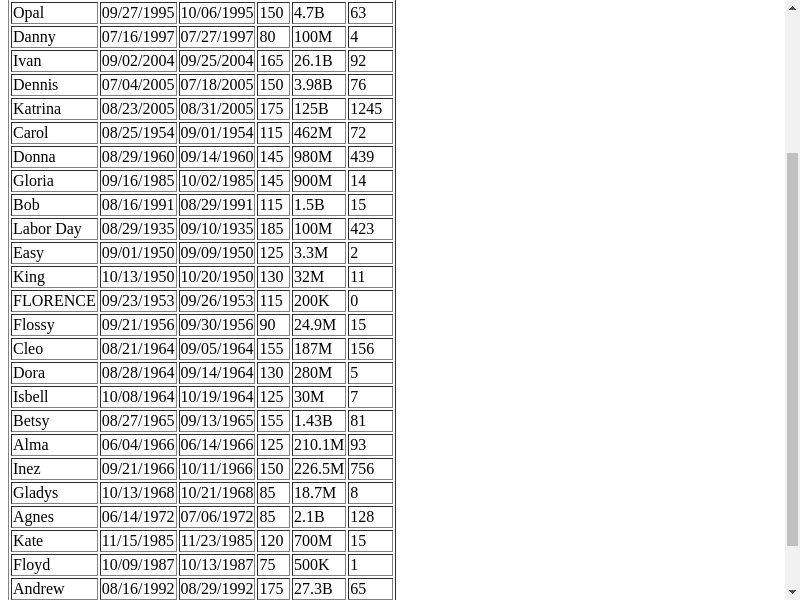

We have all the data!


In [22]:
while True:
    try:
        button = b.find_element("id", "more")
        button.click()
        show_screen()
        print("============================================================")
    except NoSuchElementException:
        print("We have all the data!")
        break
    time.sleep(1)

In [23]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function show() {
        tbl = document.getElementById("hurricanes");
        count = Math.min(10, lines.length);
        for (i=0; i<count; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
        lines = lines.slice(count);
        if (lines.length == 0) {
          document.getElementById("more").remove();
        }
      }

      function main() {
        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Keep clicking...</h1>

    <table id="hurricanes" border="1"><tr><td>name</td><td>formed</td><td>dissipated</td><td>mph</td><

### page 3: password protection example

- Operations:
    `text_object.send_keys()`: enables us to send data to textbox

In [24]:
url = "https://www.msyamkumar.com/cs320/tricky/page3.html"
b.get(url)

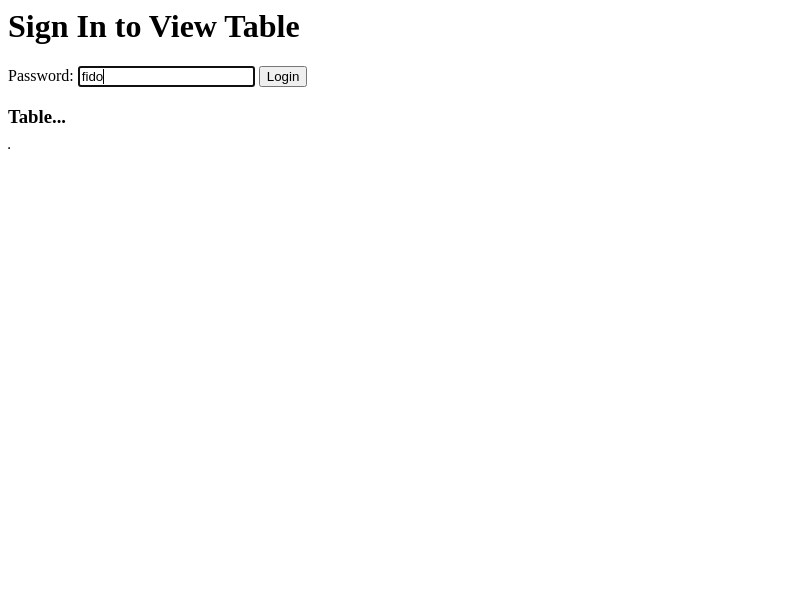

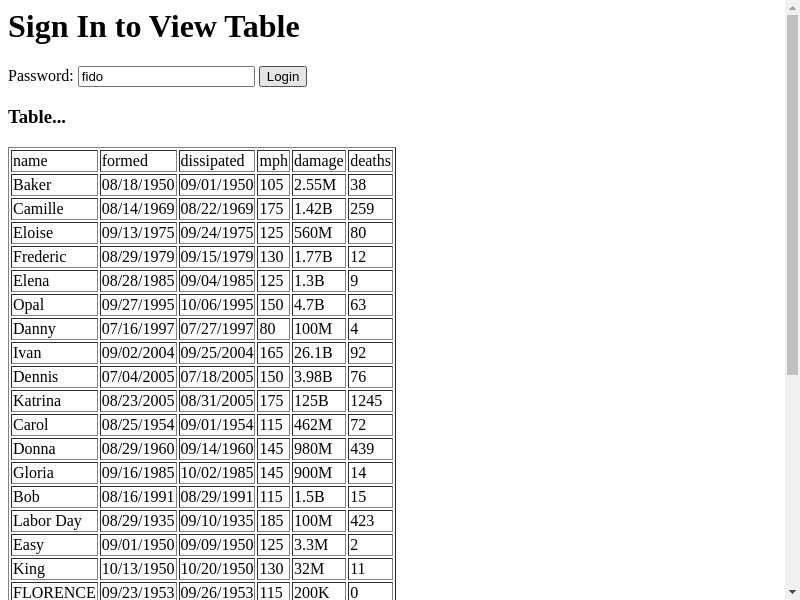

In [25]:
# TODO: find the id for password box (inspect element on browser)
# TODO: find the id for the login button (inspect element on browser)
text = b.find_element("id", "password")
button = b.find_element("id", "login_btn")

# TODO: send the password (plain text just for example purposes)
text.send_keys("fido")
show_screen()

# TODO: click the button
button.click()
show_screen()

In [26]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function login() {
        if (document.getElementById("password").value != "fido") {
          alert("sorry, password != 'fido'")
          return;
        }

        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
        }

      function show() {
        tbl = document.getElementById("hurricanes");
        tbl.innerHTML = "";
        for (i=0; i<lines.length; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
      }
      </script>
  </head>
  <body>
    <h1>Sign In to View Table</h1>

    Password: <input id="password">
    <button id="login_btn" onclick="login()">Login</button>

    <h3>Tabl

### page 4: search data for a year

- Operations:
    `text_object.clear()`: enables us to clear the previous text

In [27]:
url = "https://www.msyamkumar.com/cs320/tricky/page4.html"
b.get(url)

In [28]:
# TODO: find the id for year box (inspect element on browser)
# TODO: find the id for the search button (inspect element on browser)
text = b.find_element("id", "year")
button = b.find_element("id", "search_btn")

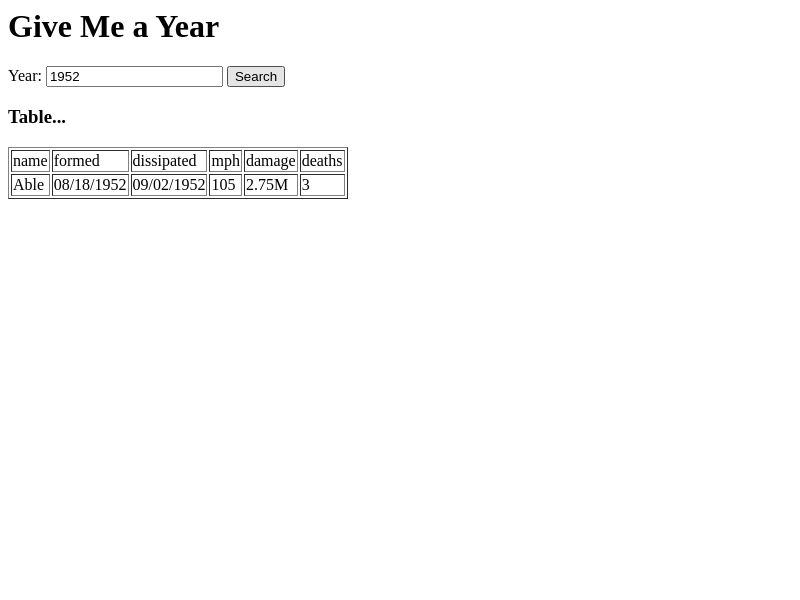

In [29]:
text.clear()
text.send_keys("1952")
button.click()
show_screen()

#### How many hurricanes were there each year?

Text(0, 0.5, 'Hurricane count')

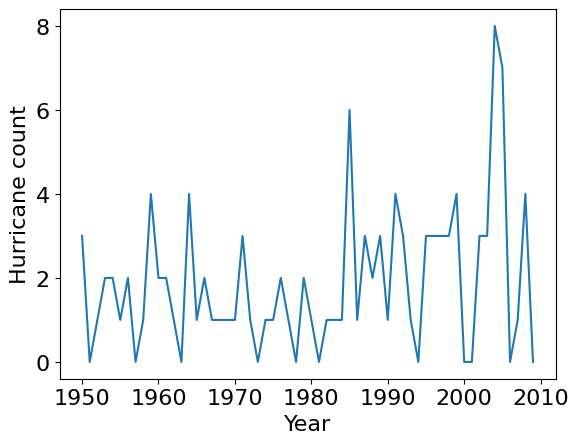

In [30]:
hurricane_counts = pd.Series(dtype=float)

for year in range(1950, 2010):
    text.clear()
    text.send_keys(str(year))
    button.click()
    # show_screen()
    
    # TODO: find all tr elements and count hurricanes for each year
    trs = b.find_elements("tag name", "tr")
    
    # TODO: We have to subtract 1 for removing header tr element
    count = len(trs) - 1
    
    hurricane_counts.loc[year] = count
    
ax = hurricane_counts.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane count")